<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B2%20Python/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%20%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8/%D0%94%D0%97_%D0%9A%D0%BE%D0%BD%D0%B4%D1%80%D0%B0%D1%82%D1%8C%D0%B5%D0%B2_STPY-48_%D0%BA%20%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8%20%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: `surgery?`, `Age`, `rectal temperature`, `pulse`, `respiratory rate`, `temperature of extremities`, `pain`, `outcome`.

### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.


### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Чтение файла с указанием значения "?" как пропущенного
data = pd.read_csv('horse_data.csv', header=None, na_values=['?'])

In [61]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [62]:
# Выбор нужных столбцов
data = data.iloc[:, [0, 1, 3, 4, 5, 6, 10, 22]]
data.columns = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']

In [63]:
data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [80]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(data, *['rectal temperature', 'temperature of extremities'], **{})
chart

<Figure size 600x600 with 0 Axes>

In [65]:
data.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [66]:
missing_values = data.isna().sum()
missing_values

surgery?                       1
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [67]:
print('pulse')
print(data['pulse'].mean())
print(data[(data['pulse'] >= 28) & (data['pulse'] <= 45)]['pulse'].mean())
print()
print('respiratory rate')
print(data['respiratory rate'].mean())
print(data[(data['respiratory rate'] >= 8) & (data['respiratory rate'] <= 16)]['respiratory rate'].mean())
print()
print('Age')
print(data['Age'].mean())
print(data[(data['Age'] > 1) & (data['Age'] <= 2)]['Age'].mean())
print()
print('rectal temperature')
print(data['rectal temperature'].mean())
print(data[(data['rectal temperature'] >= 37.5) & (data['rectal temperature'] <= 38.5)]['rectal temperature'].mean())

pulse
71.91304347826087
40.851063829787236

respiratory rate
30.417355371900825
13.584905660377359

Age
1.64
nan

rectal temperature
38.16791666666667
38.05723684210527


In [76]:
data = data.drop(data[(data['pulse'] < 28) | (data['pulse'] > 45)].index)

In [77]:
data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
12,1.0,1,37.2,42.0,12.0,2.0,3.0,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
52,2.0,1,NaN,NaN,NaN,1.0,1.0,1.0
56,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
78,1.0,1,NaN,NaN,NaN,3.0,5.0,2.0
81,1.0,1,37.3,40.0,NaN,NaN,2.0,1.0
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
89,2.0,1,38.3,42.0,10.0,1.0,1.0,1.0
93,2.0,1,NaN,NaN,NaN,3.0,5.0,2.0


In [78]:
data = data.drop(data[(data['respiratory rate'] < 8) | (data['respiratory rate'] > 16)].index)
data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
12,1.0,1,37.2,42.0,12.0,2.0,3.0,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
52,2.0,1,NaN,NaN,NaN,1.0,1.0,1.0
56,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
78,1.0,1,NaN,NaN,NaN,3.0,5.0,2.0
81,1.0,1,37.3,40.0,NaN,NaN,2.0,1.0
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
89,2.0,1,38.3,42.0,10.0,1.0,1.0,1.0
93,2.0,1,NaN,NaN,NaN,3.0,5.0,2.0


In [79]:
data = data.drop(data[(data['Age'] < 1) | (data['Age'] > 2)].index)
data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
12,1.0,1,37.2,42.0,12.0,2.0,3.0,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
52,2.0,1,NaN,NaN,NaN,1.0,1.0,1.0
56,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
78,1.0,1,NaN,NaN,NaN,3.0,5.0,2.0
81,1.0,1,37.3,40.0,NaN,NaN,2.0,1.0
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
89,2.0,1,38.3,42.0,10.0,1.0,1.0,1.0
93,2.0,1,NaN,NaN,NaN,3.0,5.0,2.0


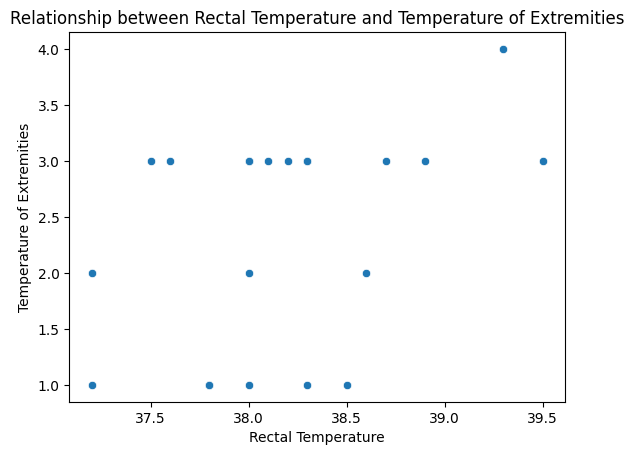

In [81]:
import seaborn as sns

# Создание точечной диаграммы
sns.scatterplot(x='rectal temperature', y='temperature of extremities', data=data)

# Добавление подписей осей и заголовка
plt.xlabel('Rectal Temperature')
plt.ylabel('Temperature of Extremities')
plt.title('Relationship between Rectal Temperature and Temperature of Extremities')

# Отображение диаграммы
plt.show()

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.